In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt

In [2]:
# Define parameters
alpha = 0.5
epsilon = 0.1
discount = 1
num_episodes = 1000
num_rows = 5
num_cols = 10
num_states = num_rows * num_cols
num_runs = 100
destination = (num_rows-1, num_cols-1)
source = (num_rows-1, 0)
num_actions = 4

In [3]:
# Epsilon greedy action selection
def epsilon_greedy(Q, state):
    val = random.uniform(0, 1)
    Qvals = Q[state[0], state[1]]
    if val > epsilon:
        action = np.argmax(Qvals)
    else:
        action = random.randint(0, num_actions - 1)
    return action

In [4]:
def nowatcliff(i, j):
    # Check if i,j is on the cliff, then return True
    if i == num_rows - 1 and j > 0 and j < num_cols - 1:
        return True
    return False

def nowatdest(i, j):
    # Check if i,j is the destination cell
    if i == num_rows - 1 and j == num_cols - 1:
        return True
    return False

In [5]:
# Take a from state s and return new state and reward
def step(s, a):
    i, j = s
    if a == 0: # Up
        if i - 1 >= 0:
            i = i - 1
        news, rew = (i, j), -1
    elif a == 1: # Down
        if i + 1 < num_rows:
            i = i + 1
        news, rew = (i, j), -1
    elif a == 2: # Right
        if j + 1 < num_cols:
            j = j + 1
        news, rew = (i,j), -1
    elif a == 3: # Left
        if j - 1 >= 0:
            j = j - 1
        news, rew =  (i,j), -1
    
    if nowatcliff(i, j):
        return source, -80
    if nowatdest(i, j):
        return news, -1
    
    return news, rew

In [6]:
# Perform Q learning
def Q_learning():
    total_reward = 0
    state = source
    while(state != destination):
        action = epsilon_greedy(Q_qlearning, state)
        next_state, reward = step(state, action)
        total_reward += reward
        # a' is greedy action
        next_action = np.argmax(Q_qlearning[next_state[0], next_state[1]])
        # Update Q
        Q_qlearning[state[0], state[1], action] += alpha * ((reward + discount * Q_qlearning[next_state[0], next_state[1], next_action]) - Q_qlearning[state[0], state[1], action])
        state = next_state
    # Clip reward 
    return max(total_reward, -100)

In [7]:
def SARSA():
    total_reward = 0
    state = source
    action = epsilon_greedy(Q_sarsa, state)
    while(state != destination):
        next_state, reward = step(state, action)
        total_reward += reward
        # a' is chosen using epsilon greedy
        next_action = epsilon_greedy(Q_sarsa, next_state)
        # Update Q
        Q_sarsa[state[0], state[1], action] += alpha * ((reward + discount * Q_sarsa[next_state[0], next_state[1], next_action]) - Q_sarsa[state[0], state[1], action])
        action = next_action
        state = next_state
    return max(total_reward, -100)

[[334.8    0.    54.  ]
 [  0.   217.44  36.  ]
 [  0.     0.     1.  ]]
[[9.10000910e-04 0.00000000e+00 4.54545455e-02]
 [0.00000000e+00 1.11929440e-02 1.16474894e+00]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00]]
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
[[334.8    0.    54.  ]
 [  0.   217.44  36.  ]
 [  0.     0.     1.  ]]
[[334.8    0.    41.45]
 [  0.   217.44  24.2 ]
 [  0.     0.     1.  ]]


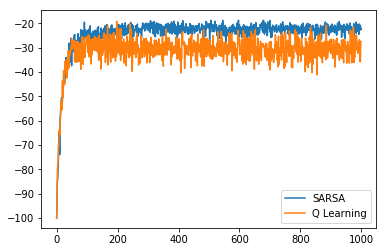

In [8]:
total_reward_sarsa_runs = np.zeros(num_episodes)
total_reward_qlearning_runs = np.zeros(num_episodes)

# Simulate different runs
for run in range(num_runs):
    Q_sarsa = np.random.rand(num_rows, num_cols, num_actions)
    Q_qlearning = np.random.rand(num_rows, num_cols, num_actions)

    total_reward_sarsa = np.zeros(num_episodes)
    total_reward_qlearning = np.zeros(num_episodes)

    for i in range(num_episodes):
        res1 = SARSA()
        total_reward_sarsa[i] = res1
        res2 = Q_learning()
        total_reward_qlearning[i] = res2
    
    total_reward_sarsa_runs += total_reward_sarsa
    total_reward_qlearning_runs += total_reward_qlearning

#print(total_reward_sarsa_runs/num_runs, total_reward_qlearning_runs/num_runs)
plt.figure()
plt.plot(total_reward_sarsa_runs/num_runs, label="SARSA")
plt.plot(total_reward_qlearning_runs/num_runs, label="Q Learning")
plt.legend()